## Pre-processing
The objective of this notebook is to clean and pre-process the training data, and apply the same pre-processing on the test set, to adapt it as input of our model.
The pre-processed train and test sets and the labels of the train set are saved in .csv format.

### imports

In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data_train = pd.read_csv("../hfactory_magic_folders/hi__paris_hackathon/building_energy_efficiency/datasets/train/train_features_sent.csv")

/opt/conda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3135: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
data_test = pd.read_csv("../hfactory_magic_folders/hi__paris_hackathon/building_energy_efficiency/datasets/test/test_features_sent.csv")

In [5]:
data_train.head()

,level_0,additional_heat_generators,additional_water_heaters,altitude,area_code,balcony_depth,bearing_wall_material,building_category,building_class,building_height_ft,...,wall_insulation_type,water_heaters,water_heating_energy_source,water_heating_type,window_filling_type,window_frame_material,window_glazing_type,window_heat_retention_factor,window_orientation,window_thermal_conductivity
0,111323,[wood stove or insert],NaN,328.08400,881,NaN,CONCRETE,[],[],13.779528,...,internal,[indeterminate oil boiler],oil,individual,argon or krypton,pvc,double glazing,1.116894,"[est,west]",15.347292
1,265182,[],NaN,360.89240,260,NaN,NaN,[condo],[2 to 11],43.635172,...,internal,[indeterminate gas boiler],gas,individual,argon or krypton,wood,double glazing,1.133072,"[est,west,sud]",17.512631
2,927507,[],NaN,324.80316,573,NaN,WOOD - OTHER,[],[],19.685040,...,internal,[standard gas boiler],gas,individual,dry air,pvc,double glazing,1.084204,"[est,west]",16.779108
3,874620,[],NaN,288.71392,204,NaN,BRICKS,[],[],13.779528,...,internal,[electric storage tank],electricity,individual,NaN,metal with thermal break,triple glazing,0.983338,"[est,north,sud]",12.630033
4,563274,[],NaN,849.73756,374,NaN,GRITSTONE,[individual house],[individual],19.028872,...,internal,[thermodynamic electric hot water (pac or tank)],thermodynamic electric hot water (heat pump or...,individual,dry air,pvc,double glazing,1.084204,"[north,sud]",13.290529


set index to identifiers of the buildings

In [6]:
data_train = data_train.set_index('level_0')

In [7]:
data_train.head()

,additional_heat_generators,additional_water_heaters,altitude,area_code,balcony_depth,bearing_wall_material,building_category,building_class,building_height_ft,building_period,...,wall_insulation_type,water_heaters,water_heating_energy_source,water_heating_type,window_filling_type,window_frame_material,window_glazing_type,window_heat_retention_factor,window_orientation,window_thermal_conductivity
level_0,,,,,,,,,,,,,,,,,,,,,
111323,[wood stove or insert],NaN,328.08400,881,NaN,CONCRETE,[],[],13.779528,1970-1988,...,internal,[indeterminate oil boiler],oil,individual,argon or krypton,pvc,double glazing,1.116894,"[est,west]",15.347292
265182,[],NaN,360.89240,260,NaN,NaN,[condo],[2 to 11],43.635172,<1948,...,internal,[indeterminate gas boiler],gas,individual,argon or krypton,wood,double glazing,1.133072,"[est,west,sud]",17.512631
927507,[],NaN,324.80316,573,NaN,WOOD - OTHER,[],[],19.685040,2000-2005,...,internal,[standard gas boiler],gas,individual,dry air,pvc,double glazing,1.084204,"[est,west]",16.779108
874620,[],NaN,288.71392,204,NaN,BRICKS,[],[],13.779528,<1948,...,internal,[electric storage tank],electricity,individual,NaN,metal with thermal break,triple glazing,0.983338,"[est,north,sud]",12.630033
563274,[],NaN,849.73756,374,NaN,GRITSTONE,[individual house],[individual],19.028872,2006-2012,...,internal,[thermodynamic electric hot water (pac or tank)],thermodynamic electric hot water (heat pump or...,individual,dry air,pvc,double glazing,1.084204,"[north,sud]",13.290529


In [8]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1010684 entries, 111323 to 31221
Data columns (total 70 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   additional_heat_generators        1010684 non-null  object 
 1   additional_water_heaters          209994 non-null   object 
 2   altitude                          992545 non-null   float64
 3   area_code                         1010684 non-null  int64  
 4   balcony_depth                     105791 non-null   object 
 5   bearing_wall_material             956635 non-null   object 
 6   building_category                 1010684 non-null  object 
 7   building_class                    1010684 non-null  object 
 8   building_height_ft                994468 non-null   float64
 9   building_period                   1010684 non-null  object 
 10  building_total_area_sqft          949721 non-null   float64
 11  building_type                     

In [9]:
labels_train = pd.read_csv("../hfactory_magic_folders/hi__paris_hackathon/building_energy_efficiency/datasets/train/train_labels_sent.csv")

In [10]:
labels_train.describe()

,level_0,energy_consumption_per_annum
count,1.010684e+06,1.010684e+06
mean,7.540240e+05,2.457073e+02
std,4.356355e+05,8.054060e+02
min,0.000000e+00,-2.040219e+03
25%,3.768322e+05,1.647793e+02
50%,7.536310e+05,2.237132e+02
75%,1.131399e+06,3.007878e+02
max,1.508482e+06,2.594328e+05


In [11]:
labels_train = labels_train.set_index('level_0')

<AxesSubplot:xlabel='energy_consumption_per_annum'>

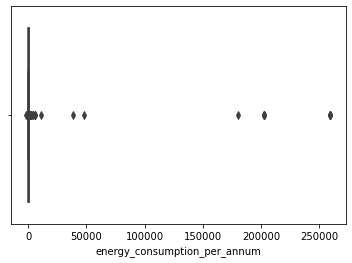

In [12]:
sns.boxplot(x=labels_train['energy_consumption_per_annum'])

### not consider abnormal consumptions

In [13]:
labels_train_5000 = labels_train[labels_train['energy_consumption_per_annum']<=5000]
data_train_5000 = data_train.loc[labels_train_5000.index]

In [14]:
print(data_train_5000.shape, labels_train_5000.shape)

(1010666, 70) (1010666, 1)


In [15]:
print('NaN occurrences in Rows:')
print(data_train.isnull().sum(axis = 1).describe())

NaN occurrences in Rows:
count    1.010684e+06
mean     1.378586e+01
std      2.812626e+00
min      1.000000e+00
25%      1.300000e+01
50%      1.400000e+01
75%      1.500000e+01
max      3.300000e+01
dtype: float64


### Useful functions

In [16]:
def compute_apply_group_agg(df_train, df_test, var, cat):
    grp = df_train.groupby([cat]).agg('mean')[var]
    ind_na = df_test[df_test[var].isna()].index
    df_test.loc[ind_na, var] = grp[df_test[cat][ind_na]].values
    return df_test

In [17]:
def compute_apply_mean(df_train, df_test, var):
    mean = np.mean(df_train[var])
    ind_na = df_test[df_test[var].isna()].index
    df_test.loc[ind_na, var] = mean
    return df_test

In [18]:
from sklearn.preprocessing import OneHotEncoder 

In [19]:
def one_hot_encoder(df, var, cols):
    encoder = OneHotEncoder(handle_unknown='ignore')
    encoder_df = pd.DataFrame(encoder.fit_transform(df[[var]]).toarray(), columns=cols)
    return encoder_df

### additional_heat_generators
1 if additional heat generators, 0 otherwise

In [20]:
data_train_5000['additional_heat_generators'].fillna('[]', inplace=True)
data_train_5000['additional_heat_generators'] = np.where(data_train_5000['additional_heat_generators'] == '[]', 0, 1).astype('int')

### additional_water_heaters
1 if additional water heats, 0 otherwise

In [21]:
data_train_5000['additional_water_heaters'].fillna('[]', inplace=True)
data_train_5000['additional_water_heaters'] = np.where(data_train_5000['additional_water_heaters'] == '[]', 0, 1).astype('int')

### altitude
Replace missing values by the altitude mean computed by area_code

In [22]:
data_train_5000 = compute_apply_group_agg(data_train_5000, data_train_5000, 'altitude', 'area_code')

In [23]:
print("Old Shape: ", data_train_5000.shape)
# Remove altitudes higher than 2800
data_train_5000 = data_train_5000[data_train_5000['altitude']<=3000]
print("New Shape: ", data_train_5000.shape)

Old Shape:  (1010666, 70)
New Shape:  (1005051, 70)


In [24]:
labels_train_5000 = labels_train_5000.loc[data_train_5000.index]

### transform in categorical variables

In [25]:
data_train_5000 = data_train_5000.astype({'area_code': "category", 'building_use_type_code': "category"})

### area_code

In [26]:
data_train_5000['area_code'].unique()

[881, 260, 573, 204, 374, ..., 191, 380, 843, 492, 369]
Length: 93
Categories (93, int64): [881, 260, 573, 204, ..., 380, 843, 492, 369]

### building_category
Consider only 3 possible categories one-hot encoded

In [27]:
valid_building_categories = ['[condo]', '[individual house]']
cols_category = ['building_category_other', 'building_category_condo', 'building_category_individual_house']

data_train_5000.loc[~data_train_5000['building_category'].isin(valid_building_categories), 'building_category']='[Other]'
data_train_5000 = pd.concat([data_train_5000, one_hot_encoder(data_train_5000,'building_category', cols_category).set_index(data_train_5000.index)], axis=1)

### building_type
Consider only possible 5 categories one-hot encoded

In [28]:
cols_type = ['building_type_flat', 'building_type_house', 'building_type_multiple_dwellings', 'building_type_Non_residential', 'building_type_shopping_centres']
data_train_5000 = pd.concat([data_train_5000, one_hot_encoder(data_train_5000, 'building_type', cols_type).set_index(data_train_5000.index)], axis=1)

### building_period
Split in different periods

In [29]:
data_train_5000 = data_train_5000[data_train_5000['building_period']!='bad sup']
cols_period = ['building_period_1949-1970', 'building_period_1970-1988', 'building_period_1989-1999', \
        'building_period_2000-2005', 'building_period_2006-2012', 'building_period_inf_1948', 'building_period_sup_2012']
data_train_5000 = pd.concat([data_train_5000, one_hot_encoder(data_train_5000, 'building_period', cols_period).set_index(data_train_5000.index)], axis=1)

### building_height_ft
Replace missing values by mean height according to the building type

In [30]:
data_train_5000 = compute_apply_group_agg(data_train_5000, data_train_5000, 'building_height_ft', 'building_type')

In [31]:
print("Old Shape: ", data_train_5000.shape)
# Remove height higher than 120 meters
data_train_5000 = data_train_5000[data_train_5000['building_height_ft']<=400]
print("New Shape: ", data_train_5000.shape)

Old Shape:  (1004971, 85)
New Shape:  (1004968, 85)


In [32]:
labels_train_5000 = labels_train_5000.loc[data_train_5000.index]

In [33]:
print(data_train_5000.shape, labels_train_5000.shape)
print(np.all(data_train_5000.index == labels_train_5000.index))

(1004968, 85) (1004968, 1)
True


### building_total_area_sqft
Replace missing values by mean total area in sqft according to the building type

In [34]:
data_train_5000 = compute_apply_group_agg(data_train_5000, data_train_5000, 'building_total_area_sqft', 'building_type')

In [35]:
print("Old Shape: ", data_train_5000.shape)
# Remove area higher than 120 000 sqft
data_train_5000 = data_train_5000[data_train_5000['building_height_ft']<=120000]
print("New Shape: ", data_train_5000.shape)

Old Shape:  (1004968, 85)
New Shape:  (1004968, 85)


In [36]:
labels_train_5000 = labels_train_5000.loc[data_train_5000.index]

### building_use_type_code

In [37]:
print(data_train_5000['building_use_type_code'].unique())
print(len(data_train_5000[data_train_5000['building_use_type_code'].isna()]))

[1, 2, 5]
Categories (3, int64): [1, 2, 5]
0


In [38]:
cols_use_type = ['Residential single-family', 'Residential multi-family', 'Commercial & Other']
data_train_5000 = pd.concat([data_train_5000, one_hot_encoder(data_train_5000, 'building_use_type_code', cols_use_type).set_index(data_train_5000.index)], axis=1)

In [39]:
print(data_train_5000['building_use_type_description'].unique())

['Residential single-family' 'Residential multi-family'
 'Commercial & Other']


### building_living_area_sqft
Replace missing values by mean living area in sqft according to the building type

In [40]:
data_train_5000 = compute_apply_group_agg(data_train_5000, data_train_5000, 'living_area_sqft', 'building_type')

In [41]:
print(len(data_train_5000[data_train_5000['living_area_sqft'].isna()]))

0


### has_air_conditioning
1 if air conditioning in the building, 0 if otherwise or missing

In [42]:
data_train_5000['has_air_conditioning'].fillna(False, inplace=True)
data_train_5000['has_air_conditioning'].replace({True:1, False:0}, inplace=True)

### has_balcony
1 if balcony present in the building, 0 if otherwise or missing

In [43]:
data_train_5000['has_balcony'].fillna(False, inplace=True)
data_train_5000['has_balcony'].replace({True:1, False:0}, inplace=True)

### lowe_floor_thermal_conductivity
impute the missing values by the mean

In [44]:
print(len(data_train_5000[data_train_5000['lowe_floor_thermal_conductivity'].isna()]))

76368


In [45]:
data_train_5000 = compute_apply_mean(data_train_5000, data_train_5000, 'lowe_floor_thermal_conductivity')

### heating_types
collective or individual heating type, individual if missing

In [46]:
data_train_5000['heating_type'].fillna('individual', inplace=True)
data_train_5000['heating_type'].replace({'individual':0, 'collective':1}, inplace=True)

### is_crossing_building
One-hot encoding for different types of crossing, maybe consider only one dummy in the training

In [47]:
to_replace_cross = {"90° crossing (weak)":"through 90°", "all through crossing (weak)":"through all way",\
              "east-west crossing (weak)":"crossing east west", "north-south crossing (weak)":"crossing north south"}
data_train_5000["is_crossing_building"].replace(to_replace_cross, inplace=True)
data_train_5000["is_crossing_building"].fillna('through all way', inplace=True)
cols_cross = ['is_crossing_building_crossing_east_west', 'is_crossing_building_crossing_north_south',\
           'is_crossing_building_not_through', 'is_crossing_building_through_90', \
           'is_crossing_building_through_all_way']
data_train_5000 = pd.concat([data_train_5000, one_hot_encoder(data_train_5000,'is_crossing_building', cols_cross).set_index(data_train_5000.index)], axis=1)

### wall_insulation_type
Isolation type recoded, missing values considered as non insulated

In [48]:
data_train_5000['wall_insulation_type'].fillna('non insulated', inplace=True)
data_train_5000['wall_insulation_type'].replace({'internal':1, 'non insulated':0, 'external':1, 'reflection':1, \
                                    'internal+external':2, 'internal+reflexion':2, 'MOB':1, \
                                    'external+reflection':2, 'insulated':1}, inplace=True)

### nb_commercial_units
missing values : no commercial units

In [49]:
print(len(data_train_5000[data_train_5000['nb_commercial_units'].isna()]))

890333


In [50]:
data_train_5000['nb_commercial_units'] = data_train_5000['nb_commercial_units'].fillna(0)

### outer_wall_thermal_conductivity
impute the missing values by the mean

In [51]:
print(len(data_train_5000[data_train_5000['outer_wall_thermal_conductivity'].isna()]))

7308


In [52]:
data_train_5000 = compute_apply_mean(data_train_5000, data_train_5000, 'outer_wall_thermal_conductivity')

### percentage_glazed_surfaced
impute the missing values by mean by building type

In [53]:
print(len(data_train_5000[data_train_5000['percentage_glazed_surfaced'].isna()]))

127546


In [54]:
data_train_5000 = compute_apply_group_agg(data_train_5000, data_train_5000, 'percentage_glazed_surfaced', 'building_type')

### upper_floor_thermal_conductivity
impute missing values by the mean of conductivity

In [55]:
print(len(data_train_5000[data_train_5000['upper_floor_thermal_conductivity'].isna()]))

45166


In [56]:
data_train_5000 = compute_apply_mean(data_train_5000, data_train_5000, 'upper_floor_thermal_conductivity')

### window_heat_retention_factor

In [57]:
print(len(data_train_5000[data_train_5000['window_heat_retention_factor'].isna()]))

22276


In [58]:
data_train_5000 = compute_apply_mean(data_train_5000, data_train_5000, 'window_heat_retention_factor')

### window_thermal_conductivity

In [59]:
print(len(data_train_5000[data_train_5000['window_thermal_conductivity'].isna()]))

5062


In [60]:
data_train_5000 = compute_apply_mean(data_train_5000, data_train_5000, 'window_thermal_conductivity')

In [61]:
print(np.all(data_train_5000.index==labels_train_5000.index))

True


### renewable_energy_sources
1 if energy, 0 otherwise, 
if missing = no renewable energy

In [62]:
data_train_5000["renewable_energy_sources"] = np.where(data_train_5000['renewable_energy_sources'].isnull(), 0, 1)

### outer_wall_thickness
fill Nan with the most popular category + transform in float

In [63]:
data_train_5000["outer_wall_thickness"].fillna('20 et -', inplace = True)
data_train_5000['outer_wall_thickness'] = data_train_5000['outer_wall_thickness'].astype(str).map(lambda x: x.rstrip(' et -')).astype(float)

### radon_risk_level

In [64]:
scale_mapper = {"low":1, "medium":2, "high":3}
data_train_5000["radon_risk_level"].fillna('low', inplace = True)
data_train_5000["radon_risk_level"] = data_train_5000["radon_risk_level"].replace(scale_mapper).astype(int)

### thermal_inertia

In [65]:
scale_mapper = {"low":1, "medium":2, "high":3, "very high":4}
data_train_5000["thermal_inertia"] = data_train_5000["thermal_inertia"].replace(scale_mapper)

## DATA INTERMEDIARY

In [66]:
data_train_base = data_train_5000[['additional_heat_generators', 'additional_water_heaters', 'altitude',
                                   'area_code','building_height_ft',
                             'building_total_area_sqft','building_use_type_code',
                                   'has_balcony', 'has_air_conditioning', 'heating_type',
                             'living_area_sqft', 'lowe_floor_thermal_conductivity',
                             'nb_commercial_units', 'nb_dwellings', 'outer_wall_thermal_conductivity',
                             'percentage_glazed_surfaced', 'upper_floor_thermal_conductivity',
                             'window_heat_retention_factor', 'window_thermal_conductivity',
                                      'outer_wall_thickness', 'radon_risk_level','renewable_energy_sources'
                                   ,'thermal_inertia','wall_insulation_type']
                                  +cols_category+cols_type+cols_period+cols_cross]

In [67]:
data_train_base

,additional_heat_generators,additional_water_heaters,altitude,area_code,building_height_ft,building_total_area_sqft,building_use_type_code,has_balcony,has_air_conditioning,heating_type,...,building_period_1989-1999,building_period_2000-2005,building_period_2006-2012,building_period_inf_1948,building_period_sup_2012,is_crossing_building_crossing_east_west,is_crossing_building_crossing_north_south,is_crossing_building_not_through,is_crossing_building_through_90,is_crossing_building_through_all_way
level_0,,,,,,,,,,,,,,,,,,,,,
111323,1,0,328.08400,881,13.779528,1291.668000,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
265182,0,0,360.89240,260,43.635172,7136.465700,2,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
927507,0,0,324.80316,573,19.685040,4197.921000,2,0,0,0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
874620,0,0,288.71392,204,13.779528,1646.876700,1,1,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
563274,0,0,849.73756,374,19.028872,1033.334400,1,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84908,0,1,1591.20740,671,17.060368,1054.862200,1,0,0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
997676,0,0,688.97640,345,26.246720,2055.904900,2,1,0,0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
311831,1,0,2805.11820,205,22.637796,2098.960500,2,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [68]:
labels_train_base = labels_train_5000.copy()

In [69]:
print(data_train_base.shape, labels_train_base.shape)

(1004968, 44) (1004968, 1)


### clean test

In [70]:
import numpy as np
import pandas as pd

In [71]:
# if train pre-processed before, import these var
valid_building_categories = ['[condo]', '[individual house]']
cols_category = ['building_category_other', 'building_category_condo', 'building_category_individual_house']

cols_type = ['building_type_flat', 'building_type_house', 'building_type_multiple_dwellings', 'building_type_Non_residential', 'building_type_shopping_centres']

cols_use_type = ['Residential single-family', 'Residential multi-family', 'Commercial & Other']

cols_period = ['building_period_1949-1970', 'building_period_1970-1988', 'building_period_1989-1999', \
        'building_period_2000-2005', 'building_period_2006-2012', 'building_period_inf_1948', 'building_period_sup_2012']
to_replace_cross = {"90° crossing (weak)":"through 90°", "all through crossing (weak)":"through all way",\
              "east-west crossing (weak)":"crossing east west", "north-south crossing (weak)":"crossing north south"}

cols_cross = ['is_crossing_building_crossing_east_west', 'is_crossing_building_crossing_north_south',\
           'is_crossing_building_not_through', 'is_crossing_building_through_90', \
           'is_crossing_building_through_all_way']

In [72]:
# if train pre-processed before, import these fcts

In [73]:
def compute_apply_group_agg(df_train, df_test, var, cat):
    grp = df_train.groupby([cat]).agg('mean')[var]
    ind_na = df_test[df_test[var].isna()].index
    df_test.loc[ind_na, var] = grp[df_test[cat][ind_na]].values
    return df_test

In [74]:
def compute_apply_mean(df_train, df_test, var):
    mean = np.mean(df_train[var])
    ind_na = df_test[df_test[var].isna()].index
    df_test.loc[ind_na, var] = mean
    return df_test

In [75]:
from sklearn.preprocessing import OneHotEncoder 

In [76]:
def one_hot_encoder(df, var, cols):
    encoder = OneHotEncoder(handle_unknown='ignore')
    encoder_df = pd.DataFrame(encoder.fit_transform(df[[var]]).toarray(), columns=cols)
    return encoder_df

In [77]:
cols_inter = ['additional_heat_generators', 'additional_water_heaters', 'altitude',
                                   'area_code','building_height_ft',
                             'building_total_area_sqft','building_use_type_code',
                                   'has_balcony', 'has_air_conditioning', 'heating_type',
                             'living_area_sqft', 'lowe_floor_thermal_conductivity',
                             'nb_commercial_units', 'nb_dwellings', 'outer_wall_thermal_conductivity',
                             'percentage_glazed_surfaced', 'upper_floor_thermal_conductivity',
                             'window_heat_retention_factor', 'window_thermal_conductivity',
                                      'outer_wall_thickness', 'radon_risk_level','renewable_energy_sources',
              'thermal_inertia','wall_insulation_type']+cols_category+cols_type+cols_period+cols_cross

In [78]:
data_test = pd.read_csv("../hfactory_magic_folders/hi__paris_hackathon/building_energy_efficiency/datasets/test/test_features_sent.csv", index_col=0)

/opt/conda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3135: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [79]:
#data_test = data_test[list(data_train_base.columns)]
data_test.head()

,additional_heat_generators,additional_water_heaters,altitude,area_code,balcony_depth,bearing_wall_material,building_category,building_class,building_height_ft,building_period,...,wall_insulation_type,water_heaters,water_heating_energy_source,water_heating_type,window_filling_type,window_frame_material,window_glazing_type,window_heat_retention_factor,window_orientation,window_thermal_conductivity
level_0,,,,,,,,,,,,,,,,,,,,,
1371914,[],NaN,249.34384,615,NaN,BRICKS,[],[],19.685040,1970-1988,...,internal,[electric storage tank],electricity,individual,dry air,wood,double glazing,1.067688,"[north,sud]",21.349539
618756,[],NaN,104.98688,304,NaN,STONE,[],[],28.215224,1970-1988,...,non insulated,[electric storage tank],electricity,individual,argon or krypton,pvc,double glazing,1.149140,[west],13.963716
871032,[],NaN,72.17848,204,NaN,BRICKS,[individual house],[individual],25.918636,1949-1970,...,non insulated,[indeterminate gas boiler],gas,individual,dry air,pvc,double glazing,1.084204,"[north,sud]",14.649374
1430640,[oil stove or insert],NaN,800.52496,858,NaN,BRICKS,[individual house],[individual],15.748032,1989-1999,...,internal,[electric storage tank],electricity,individual,dry air,wood,double glazing,1.067688,"[est,west]",15.347292
86306,[wood stove or insert],NaN,1010.49872,671,NaN,GRITSTONE,[individual house],[individual],0.000000,2006-2012,...,internal,[electric storage tank],electricity,individual,dry air,pvc,double glazing,3.592767,[],17.512631


In [80]:
data_train = pd.read_csv("../hfactory_magic_folders/hi__paris_hackathon/building_energy_efficiency/datasets/train/train_features_sent.csv", index_col=0)

/opt/conda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3135: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [81]:
data_test['additional_heat_generators'].fillna('[]', inplace=True)
data_test['additional_heat_generators'] = np.where(data_test['additional_heat_generators'] == '[]', 0, 1).astype('int')

data_test['additional_water_heaters'].fillna('[]', inplace=True)
data_test['additional_water_heaters'] = np.where(data_test['additional_water_heaters'] == '[]', 0, 1).astype('int')

data_test = compute_apply_group_agg(data_train, data_test, 'altitude', 'area_code')

data_test.loc[~data_test['building_category'].isin(valid_building_categories), 'building_category']='[Other]'
data_test = pd.concat([data_test, one_hot_encoder(data_test,'building_category', cols_category).set_index(data_test.index)], axis=1)

data_test = pd.concat([data_test, one_hot_encoder(data_test, 'building_type', cols_type).set_index(data_test.index)], axis=1)

data_test = pd.concat([data_test, one_hot_encoder(data_test, 'building_use_type_code', cols_use_type).set_index(data_test.index)], axis=1)

data_test["building_period"].fillna('1970-1988', inplace = True)
data_test["building_period"].replace('bad sup','1970-1988', inplace = True)
data_test["building_period"].replace('bad inf','1970-1988', inplace = True)
data_test = pd.concat([data_test, one_hot_encoder(data_test, 'building_period', cols_period).set_index(data_test.index)], axis=1)

data_test = compute_apply_mean(data_train, data_test, 'nb_dwellings')
data_test = compute_apply_group_agg(data_train, data_test, 'building_height_ft', 'building_type')

data_test = compute_apply_group_agg(data_train, data_test , 'building_total_area_sqft', 'building_type')

data_test = compute_apply_group_agg(data_train, data_test, 'living_area_sqft', 'building_type')

data_test = compute_apply_mean(data_train, data_test, 'lowe_floor_thermal_conductivity')

data_test['has_air_conditioning'].fillna(False, inplace=True)
data_test['has_air_conditioning'].replace({True:1, False:0}, inplace=True)

data_test['has_balcony'].fillna(False, inplace=True)
data_test['has_balcony'].replace({True:1, False:0}, inplace=True)

data_test['heating_type'].fillna('individual', inplace=True)
data_test['heating_type'].replace({'individual':0, 'collective':1}, inplace=True)

data_test['wall_insulation_type'].fillna('non insulated', inplace=True)
data_test['wall_insulation_type'].replace({'internal':1, 'non insulated':0, 'external':1, 'reflection':1, \
                                    'internal+external':2, 'internal+reflexion':2, 'MOB':1, \
                                    'external+reflection':2, 'insulated':1}, inplace=True)

data_test["is_crossing_building"].replace(to_replace_cross, inplace=True)
data_test["is_crossing_building"].fillna('through all way', inplace=True)
data_test = pd.concat([data_test, one_hot_encoder(data_test,'is_crossing_building', cols_cross).set_index(data_test.index)], axis=1)

data_test['nb_commercial_units'] = data_test['nb_commercial_units'].fillna(0)

data_test= compute_apply_mean(data_train, data_test, 'outer_wall_thermal_conductivity')

data_test= compute_apply_group_agg(data_train, data_test, 'percentage_glazed_surfaced', 'building_type')

data_test= compute_apply_mean(data_train, data_test, 'upper_floor_thermal_conductivity')

data_test = compute_apply_mean(data_train, data_test, 'window_heat_retention_factor')

data_test = compute_apply_mean(data_train, data_test , 'window_thermal_conductivity')

data_test["renewable_energy_sources"] = np.where(data_test['renewable_energy_sources'].isnull(), 0, 1)

data_test["outer_wall_thickness"].fillna('20 et -', inplace = True)
data_test['outer_wall_thickness'] = data_test['outer_wall_thickness'].astype(str).map(lambda x: x.rstrip(' et -')).astype(float)

scale_mapper = {"low":1, "medium":2, "high":3, "very high":4}
data_test["thermal_inertia"] = data_test["thermal_inertia"].replace(scale_mapper)

scale_mapper = {"low":1, "medium":2, "high":3}
data_test["radon_risk_level"].fillna('low', inplace = True)
data_test["radon_risk_level"] = data_test["radon_risk_level"].replace(scale_mapper).astype(int)

In [82]:
cols_inter

['additional_heat_generators',
 'additional_water_heaters',
 'altitude',
 'area_code',
 'building_height_ft',
 'building_total_area_sqft',
 'building_use_type_code',
 'has_balcony',
 'has_air_conditioning',
 'heating_type',
 'living_area_sqft',
 'lowe_floor_thermal_conductivity',
 'nb_commercial_units',
 'nb_dwellings',
 'outer_wall_thermal_conductivity',
 'percentage_glazed_surfaced',
 'upper_floor_thermal_conductivity',
 'window_heat_retention_factor',
 'window_thermal_conductivity',
 'outer_wall_thickness',
 'radon_risk_level',
 'renewable_energy_sources',
 'thermal_inertia',
 'wall_insulation_type',
 'building_category_other',
 'building_category_condo',
 'building_category_individual_house',
 'building_type_flat',
 'building_type_house',
 'building_type_multiple_dwellings',
 'building_type_Non_residential',
 'building_type_shopping_centres',
 'building_period_1949-1970',
 'building_period_1970-1988',
 'building_period_1989-1999',
 'building_period_2000-2005',
 'building_period_200

In [83]:
data_test = data_test[cols_inter]
data_test

,additional_heat_generators,additional_water_heaters,altitude,area_code,building_height_ft,building_total_area_sqft,building_use_type_code,has_balcony,has_air_conditioning,heating_type,...,building_period_1989-1999,building_period_2000-2005,building_period_2006-2012,building_period_inf_1948,building_period_sup_2012,is_crossing_building_crossing_east_west,is_crossing_building_crossing_north_south,is_crossing_building_not_through,is_crossing_building_through_90,is_crossing_building_through_all_way
level_0,,,,,,,,,,,,,,,,,,,,,
1371914,0,0,249.343840,615,19.685040,581.250600,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
618756,0,0,104.986880,304,28.215224,721.181300,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
871032,0,0,72.178480,204,25.918636,699.653500,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1430640,1,0,800.524960,858,15.748032,1248.612400,1,0,0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
86306,1,0,1010.498720,671,0.000000,1345.487500,1,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845834,0,0,323.278589,467,16.209015,1245.772849,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
279675,0,0,377.296600,748,15.748032,1302.431900,1,0,1,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
811813,0,0,830.052520,838,36.089240,3387.454832,2,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [84]:
data_train_base.to_csv("data_train_base.csv")
labels_train_base.to_csv("labels_train_base.csv")

In [85]:
data_test.to_csv("data_test_base.csv")